In [24]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [6]:
import numpy as np
a = np.array(range(1,101)).reshape(10,10)
print(a[::2,::2])

[[ 1  3  5  7  9]
 [21 23 25 27 29]
 [41 43 45 47 49]
 [61 63 65 67 69]
 [81 83 85 87 89]]


## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [2]:
import numpy as np
# для оценки времени исоплнения блока
%%time
# зададим длину нашей последовательности
dlina_posl = 100_000_000

a = np.empty([dlina_posl], dtype = np.int8)
print(np.mean(a))

UsageError: Line magic function `%%time` not found.


In [56]:
# решение без использования numpy
# для оценки времени исоплнения блока
#%%time

print(sum(a)/len(a))

0.0


## Задание 3

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [129]:
import numpy as np
import pandas as pd

r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))
s = s.sort_values()

print(s[s>5].index[0])

67


## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

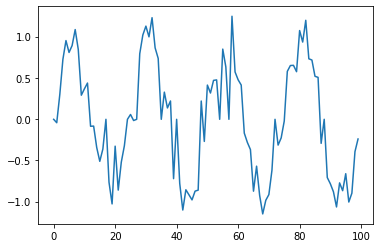

In [87]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

# ваш код тут
df = df.fillna(df.mean(axis=0))
# отобразим
plt.plot(df.target.values)

## Задание 5

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [114]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

# ваш код тут
print(df[df['возраст']>40])

print(df[df['доход']>df['доход'].mean()])

print(df[(df['доход']>df['доход'].mean()) & (df['надежность']<df['надежность'].mean())])

df['важность'] = df['доход'] * df['надежность']

df['долгосрочность'] = df['важность'] * (df['возраст'].mean()-df['возраст'])

print(df)

    имя  возраст   доход  надежность  пол
0  Петя       45  100000        0.65  муж
2   Аня       41  150000        0.87  жен
    имя  возраст   доход  надежность  пол
0  Петя       45  100000        0.65  муж
2   Аня       41  150000        0.87  жен
    имя  возраст   доход  надежность  пол
0  Петя       45  100000        0.65  муж
     имя  возраст   доход  надежность  пол  важность  долгосрочность
0   Петя       45  100000        0.65  муж   65000.0       -763750.0
1   Вася       26   80000        0.74  муж   59200.0        429200.0
2    Аня       41  150000        0.87  жен  130500.0      -1011375.0
3  Света       21   60000        0.68  жен   40800.0        499800.0


## Задание 6

Используя материалы блока Exploratory data analysis материалов 2го модуля вывести имена всех выживших детей и их количество

In [115]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [128]:
res = data[(data['Age']<18) & (data['Survived']>0)]['Name']
print(res)
print(res.count())

9           Mrs. Nicholas (Adele Achem) Nasser
10              Miss. Marguerite Rut Sandstrom
22                          Miss. Anna McGowan
39                  Miss. Jamila Nicola-Yarred
42     Miss. Simonne Marie Anne Andree Laroche
                        ...                   
826     Mrs. Antoni (Selini Alexander) Yasbeck
827             Master. George Sibley Richards
849                   Miss. Mary Conover Lines
865             Master. Harold Theodor Johnson
871                   Miss. Adele Kiamie Najib
Name: Name, Length: 65, dtype: object
65
